# Installing & Importing Basic library

In [1]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 26.4 MB/s eta 0:00:00


In [2]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


# PART A

## Q1


### A,B. Reading Csv, json files

In [3]:
car_name_df = pd.read_csv("Car name.csv")

In [4]:
car_attributes_df = pd.read_json("Car-Attributes.json")

### C. Merge both dataframes

In [5]:
## Displaying 1st 5 rows of car name df
car_name_df.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [6]:
## Displaying 1st 5 rows of car attributes df
car_attributes_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
## Printing shape of both dataframes

print("Shape of car_name_df = " , car_name_df.shape)
print("Shape of car_attributes_df = " , car_attributes_df.shape)

Shape of car_name_df =  (398, 1)
Shape of car_attributes_df =  (398, 8)


In [8]:
car_merged_df = pd.concat([car_name_df, car_attributes_df], axis=1)

In [9]:
## Displaying 1st 10 rows of merged df
car_merged_df.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


### D. 5 point summary of numerical data


In [10]:
car_merged_df.describe().loc[['min','25%','50%','75%','max']]

,mpg,cyl,disp,wt,acc,yr,origin
min,9.0,3.0,68.00,1613.00,8.000,70.0,1.0
25%,17.5,4.0,104.25,2223.75,13.825,73.0,1.0
50%,23.0,4.0,148.50,2803.50,15.500,76.0,1.0
75%,29.0,8.0,262.00,3608.00,17.175,79.0,2.0
max,46.6,8.0,455.00,5140.00,24.800,82.0,3.0


#### Insights:
1. `mpg` has its Q1 (25%ile) at 17.5, 50th %ile at 23, and Q3(75%ile) at 29.0
2. `cyl`,`yr`,`origin` are discrete variable, with their average frequencies as 4, 76 & 1 respectively.
3. `wt` has its Q1 at 2223, 50th %ile at 2803, and Q3 at 3608. IQR= 1384.25.
4. `disp` has Q1 at 104, 50th %ile at 148.5, & Q3 at 262. IQR=157.75.
5. `acc` column has Q1 at 13.825, 50th %ile at 15.500, Q3 at 17.175. IQR=3.35.

## Q2

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [11]:
## Checking for null values
car_merged_df.isnull().mean()*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

- Hence, there's no missing values

### B. Check for duplicate values in the data and impute with the best suitable approach

In [12]:
car_merged_df[car_merged_df.duplicated()==True]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


- Hence, there are no duplicate rows

### C. Plot a pairplot for all features

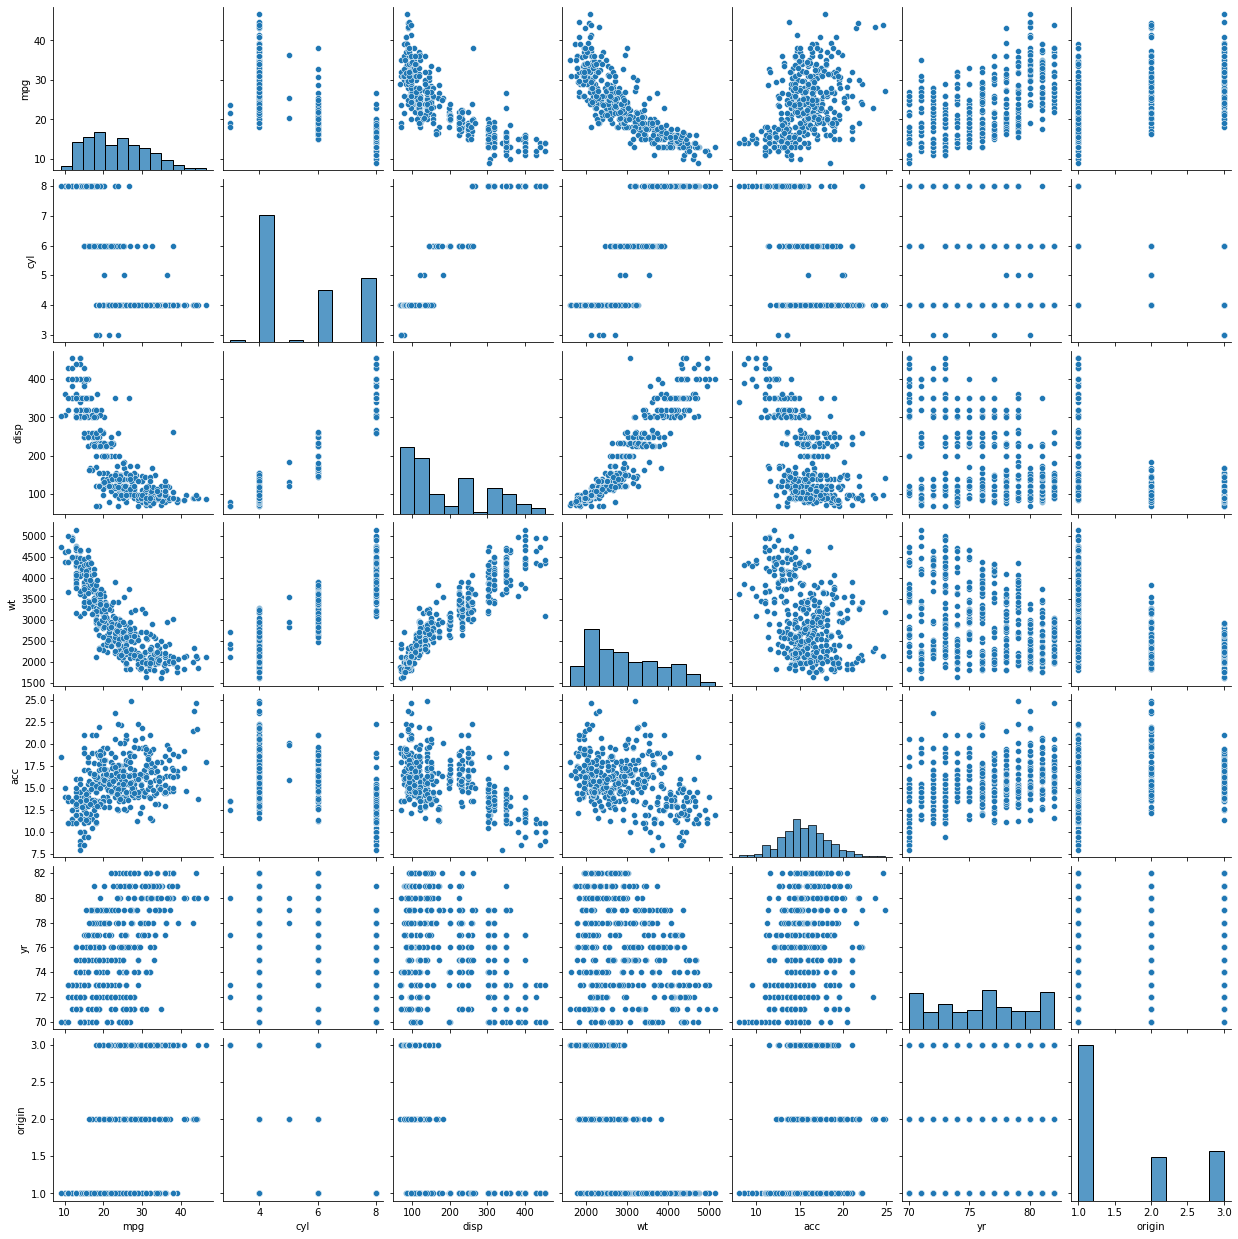

In [13]:
sns.pairplot(car_merged_df)
plt.show()

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

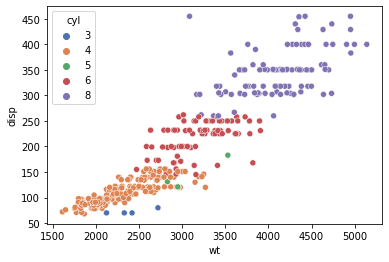

In [14]:
sns.scatterplot(x=car_merged_df['wt'], y=car_merged_df['disp'], hue=car_merged_df['cyl'], palette="deep")
plt.show()

### E. Share insights for Q2.d

1. Vehicles with weight <3000 and disp <200 have mostly 4 cylinders, as marked by orange color in the above scatterplot.
2. Vehicles with weight >2500 & <4000, with disp between 200 & 275, have majority of 6 cylinders as marked by red color in the above scatterplot.
3. Almost all Vehicles with weight >3500, with disp > 300, have 8 cylinders as marked by violet color in the above scatterplot
4. There are very few vehicles having cylinders 3 and 5. These are at very low value of displ (<=175).
5. We observe an increasing trend of cylinders with the increase in `wt` & increase in `disp`, as seen from the above scatterplot.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl

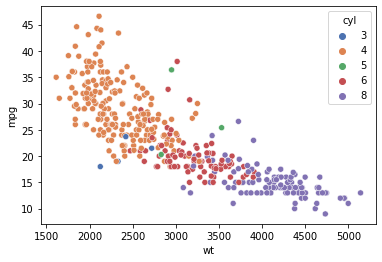

In [15]:
sns.scatterplot(x=car_merged_df['wt'], y=car_merged_df['mpg'], hue=car_merged_df['cyl'], palette="deep")
plt.show()

### G. Share insights for Q2.f

1. Vehicles with weight <3000 and mpg >20 have mostly 4 cylinders, as marked by orange color in the above scatterplot.
2. Vehicles with weight >2750 & <3750, with mpg between 15 & 25, have majority of 6 cylinders as marked by red color in the above scatterplot.
3. Almost all Vehicles with weight >3500, with mpg < 20, have 8 cylinders as marked by violet color in the above scatterplot
4. There are very few vehicles having cylinders 3 and 5, and don't have any observed pattern.
5. We observe an increasing trend of cylinders with increase in `wt` & decrease in `mpg`, as seen from the above scatterplot.

### H. Check for unexpected values in all the features and datapoints with such values

In [16]:
## Let's look at large rows of data, to get insight on different type of values in the dataframe
car_merged_df.head(30)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [17]:
## Checking datatypes of dataframe
car_merged_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [18]:
## Checking if *yr* column has any anamoly in years(like any 3 digit year, because format is of 2 digit)
car_merged_df['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: yr, dtype: int64

In [19]:
## Checking if *origin* column has any anamoly
car_merged_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

- Only *car_name* & *hp* object datatype, remaining are numerical datatypes. Since, there are no missing values, hence, column with numerical types won't have any unexpected values.
- "car_name" is not much of a concerning column
- multi-valued discrete columns don't have any anolomy

Now, let's check for *hp* column, and try to convert into float

In [20]:
try:
    car_merged_df['hp'].astype(float)
except Exception as e: print("Exception occurred = ", e)

Exception occurred =  could not convert string to float: '?'


In [21]:
car_merged_df[car_merged_df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


- Hence, there are 6 rows which have anomoly in *hp* column, as they contain the value "?"

In [22]:
## Converting "?" to null

car_merged_df['hp'].replace('?',np.nan,inplace=True)

In [23]:
car_merged_df.iloc[32,:]

car_name    ford pinto
mpg               25.0
cyl                  4
disp              98.0
hp                 NaN
wt                2046
acc               19.0
yr                  71
origin               1
Name: 32, dtype: object

In [24]:
car_merged_df.dropna(inplace=True)

In [25]:
try:
    car_merged_df['hp'].astype(float)
except Exception as e: print("Exception occurred = ", e)

- Hence, unexpected values are successfully dropped from the dataframe

## Q3

### A,B Apply K-Means clustering for 2 to 10 clusters, Plot Visual and spot elbow point

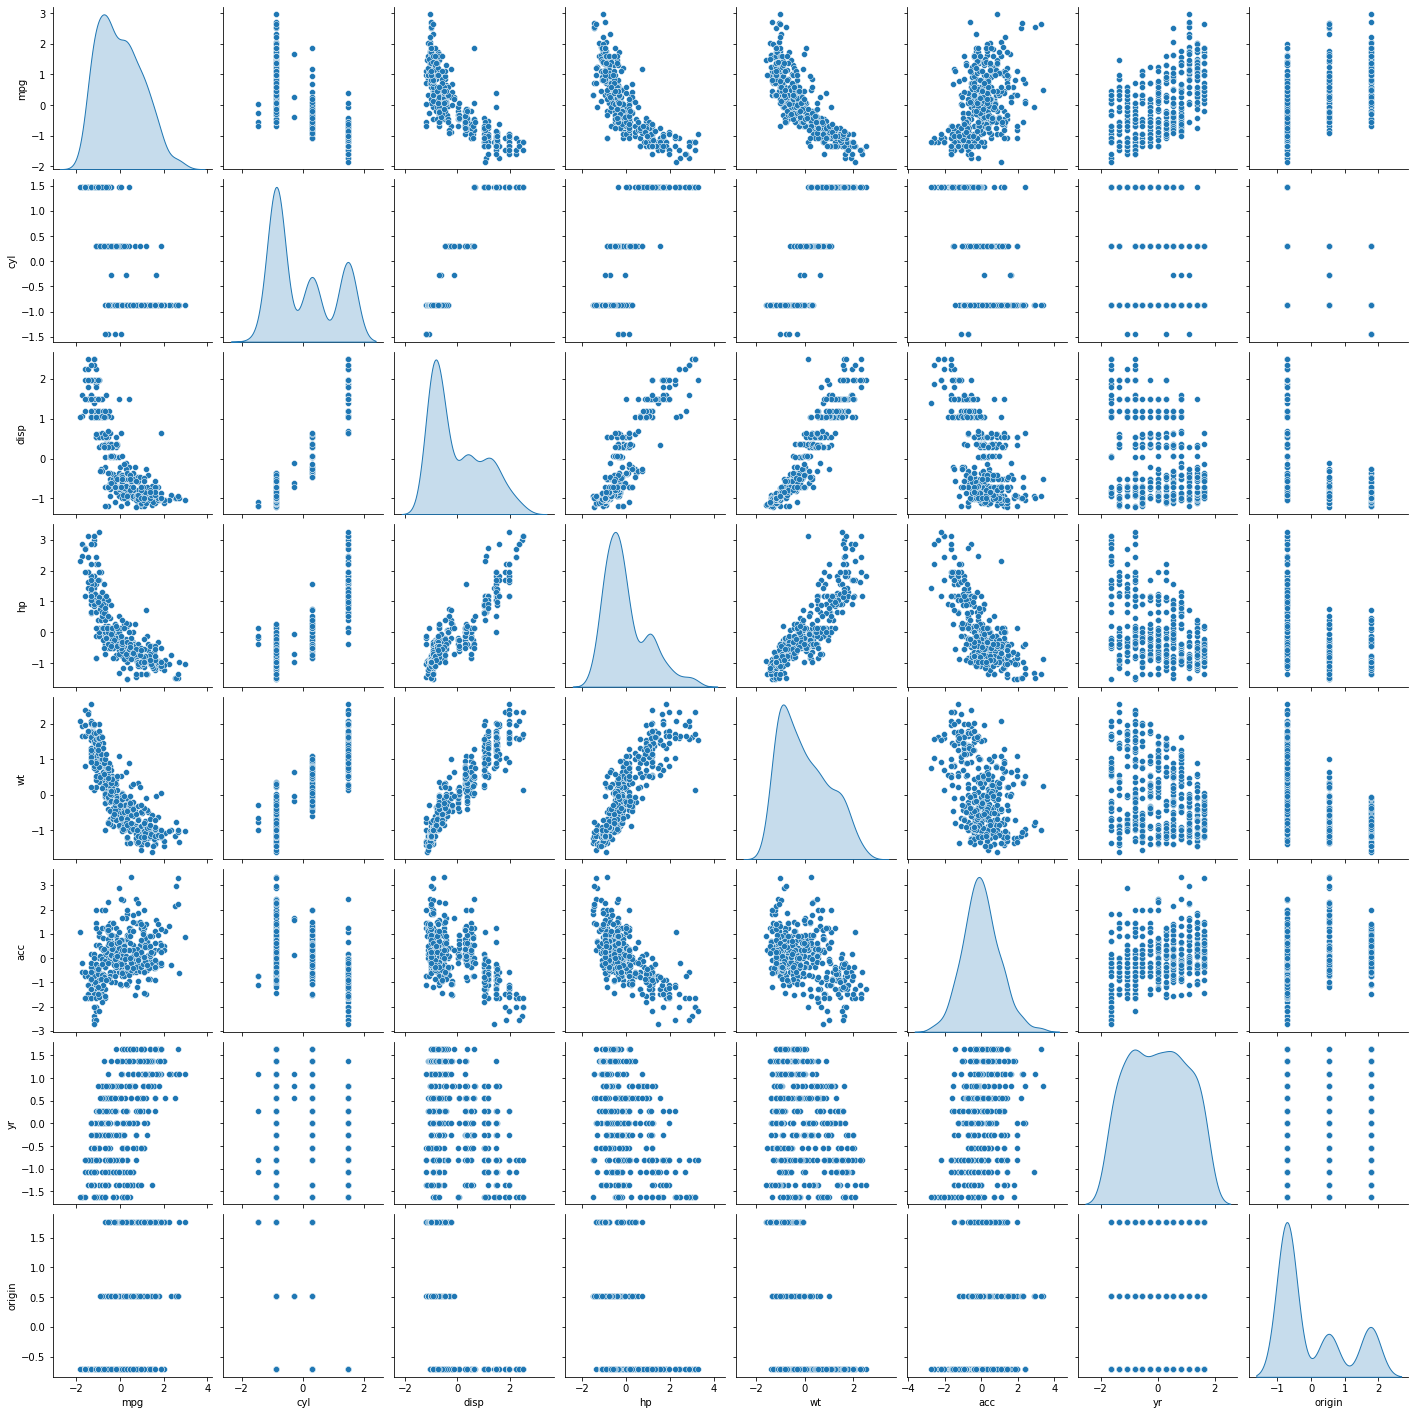

In [26]:
## Scaling(Normalising) the data
car_merged_df_scaled=car_merged_df.iloc[:,1:].apply(zscore)
sns.pairplot(car_merged_df_scaled,diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

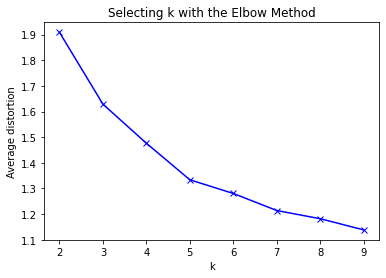

In [27]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_merged_df_scaled)
    prediction=model.predict(car_merged_df_scaled)
    meanDistortions.append(sum(np.min(cdist(car_merged_df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_merged_df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


- It appears that K=5 or K=6 might be the elbow point here.

### C. On the above visual, highlight which are the possible Elbow points

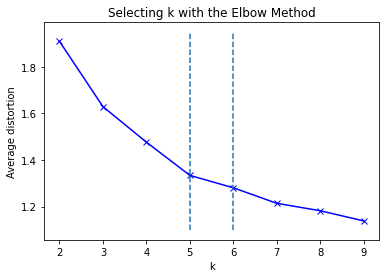

In [28]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.vlines([5,6], plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

### D. Train a K-means clustering model once again on the optimal number of clusters

In [29]:
## Training using K=5
model_1=KMeans(5)
model_1.fit(car_merged_df_scaled)
prediction_model_1=model_1.predict(car_merged_df_scaled)

## Training using K=6
model_2=KMeans(6)
model_2.fit(car_merged_df_scaled)
prediction_model_2=model_2.predict(car_merged_df_scaled)


### E. Add a new feature in the DataFrame which will have labels based upon cluster value

In [30]:
## For K=6
car_merged_df_group=car_merged_df.copy()
car_merged_df_group["group"] = prediction_model_2
car_merged_df_scaled["group"] = prediction_model_2
print("Groups Assigned : \n")
car_merged_df_cluster = car_merged_df_group.groupby(['group'])
car_merged_df_cluster.mean()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin
group,,,,,,,,
0,29.372727,4.181818,132.254545,84.400000,2505.272727,15.814545,79.963636,1.000000
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,25.054545,4.136364,109.530303,91.409091,2387.545455,14.948485,74.530303,2.500000
3,34.807812,4.046875,98.687500,68.734375,2163.671875,17.290625,79.578125,2.718750
4,24.553125,4.000000,112.328125,74.281250,2333.750000,18.646875,72.843750,1.406250
5,19.159259,6.209877,233.234568,101.679012,3306.666667,16.670370,75.765432,1.049383


### F. Plot a visual and color the datapoints based upon clusters

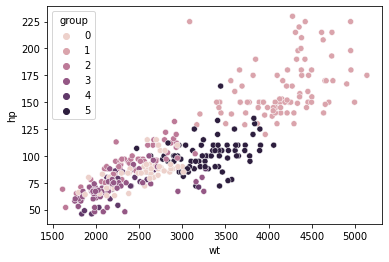

In [31]:
sns.scatterplot(car_merged_df_group,x='wt',y='hp',hue='group')
plt.show()

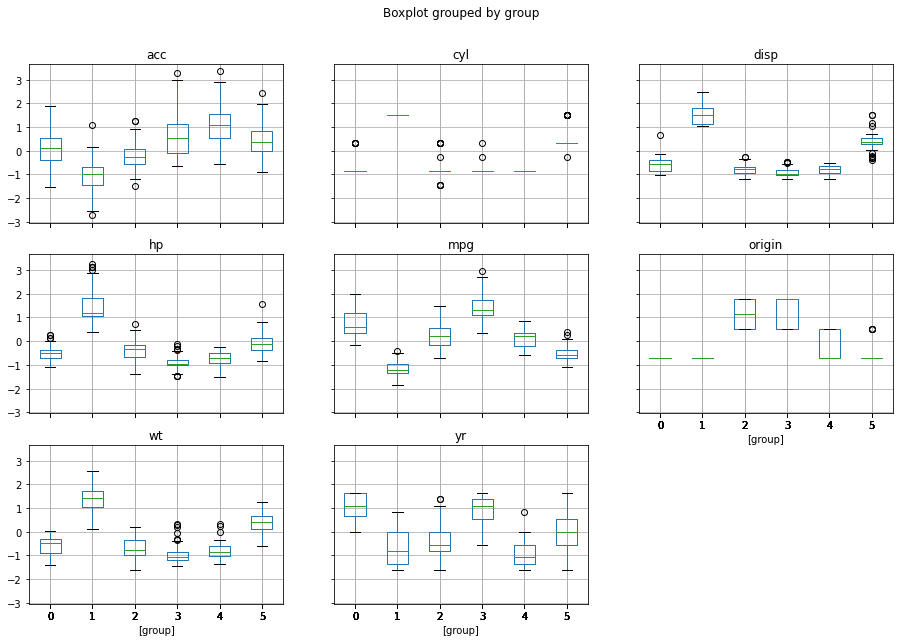

In [32]:
## Boxplot for K=6
car_merged_df_scaled.boxplot(by='group',figsize=(15,10))
plt.show()

#### Inference
Hence, from the scatterplot it looks K=6 is an optimal cluster

### G. Pass a new DataPoint and predict which cluster it belongs to

In [33]:
car_merged_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [34]:
x={'car_name':'suzuki siaz', 
   'mpg':21,
   'cyl':6,
   'disp':199,
   'hp':97,
   'wt':2774,
   'acc':15.5,
   'yr':70,
   'origin':1}
x_df=pd.DataFrame(x,index=[0])

In [35]:
x_df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,suzuki siaz,21,6,199,97,2774,15.5,70,1


In [36]:
newdata=pd.concat([car_merged_df,x_df],ignore_index = True)
newdata_scaled = newdata.iloc[:,1:].apply(zscore)
newdata_prediction=model_2.predict(newdata_scaled)
newdata['group']=newdata_prediction
newdata.iloc[-1:,:]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,group
392,suzuki siaz,21.0,6,199.0,97.0,2774,15.5,70,1,5


#### Inference:
- Hence, on adding the new data point, it got clustered into group 5

# PART B

## Q1.

### A. Read ‘vehicle.csv’ and save as DataFrame

In [37]:
df_vehicle=pd.read_csv("vehicle.csv")

In [38]:
df_vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### B. Check percentage of missing values and impute with correct approach

In [39]:
df_vehicle.isnull().mean()*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [40]:
df_vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

- Hence, there are missing values in the dataset. The above two shows percentage and total number of missing values feature-wise.
- There are 846 rows and 19 columns in this dataframe
- To impute, there are several techniquest, such as mean and mode. However, we will used a more advanced technique in this case, which is imputing using KNN.

In [41]:
## Filter the columns which have null values in needed to be imputed
df_vehicle_knn=df_vehicle.filter(['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
                          'scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance',
                          'scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1',
                          'skewness_about','skewness_about.1','skewness_about.2'],axis=1).copy()

In [42]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_vehicle_knn = pd.DataFrame(scaler.fit_transform(df_vehicle_knn), columns = df_vehicle_knn.columns)


In [43]:
# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_vehicle_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_vehicle_knn), columns=df_vehicle_knn.columns)


In [44]:
df_vehicle_knn_imputed.isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [45]:
## Looping through df_vehicle_knn_imputed columns, and assigning the values to original dataframe
for col in df_vehicle_knn_imputed.columns:
    df_vehicle[col]=df_vehicle_knn_imputed[col]

In [46]:
df_vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

- Hence, as you can see there are no more null values in the data.

### C. Visualize a Pie-chart and print percentage of values for variable ‘class

In [47]:
df_vehicle['class'].head(10)

0    van
1    van
2    car
3    van
4    bus
5    bus
6    bus
7    van
8    van
9    car
Name: class, dtype: object

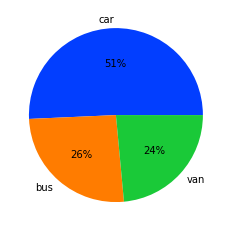

In [48]:
palette_color=sns.color_palette('bright')
data=df_vehicle['class'].value_counts()
plt.pie(data,labels=data.index, colors=palette_color, autopct='%.0f%%')
plt.show()

- From the above pie chart, "car" occupies the majority (51%) of the data

### D. Check for duplicate rows in the data and impute with correct approach

In [49]:
df_vehicle[df_vehicle.duplicated()]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


- Hence, there are no duplicate rows in the dataframe


## Q2

### A. Split data into X and Y. [Train and Test optional]

In [50]:
X=df_vehicle.drop(columns='class')
Y=df_vehicle['class']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### B. Standardize the Data

In [51]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)


## Q3

### A. Train a base Classification model using SVM

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Base SVM Classifier
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_scaled, y_train)
 
# Model performance
 
y_pred = svm.predict(X_test_scaled)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.894


- Hence, using a base SVM classification (or SVC), we are able to generate accuracy score ~89.4%

### B. Print Classification metrics for train data

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.86      0.92      0.89        52
         car       0.91      0.86      0.88        78
         van       0.93      0.93      0.93        40

    accuracy                           0.89       170
   macro avg       0.90      0.90      0.90       170
weighted avg       0.90      0.89      0.89       170



### C. Apply PCA on the data with 10 components

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train_scaled)

PCA(n_components=10)

In [55]:
print(pca.explained_variance_)

[9.43121013 2.98687907 2.00000945 1.21180139 0.90186938 0.48869506
 0.33623849 0.2238922  0.15404854 0.09097473]


### D. Visualize Cumulative Variance Explained with Number of Components

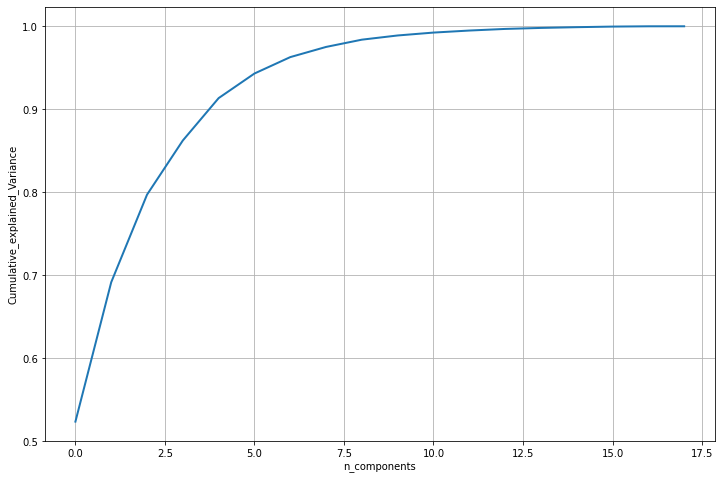

In [56]:
## Instead of splitting into train and test, applying PCA on whole of the data

XScaled=StandardScaler().fit_transform(X)

pca=PCA()
pca.n_components=18
pca.fit_transform(XScaled)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(12,8))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis=('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_Variance')
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%

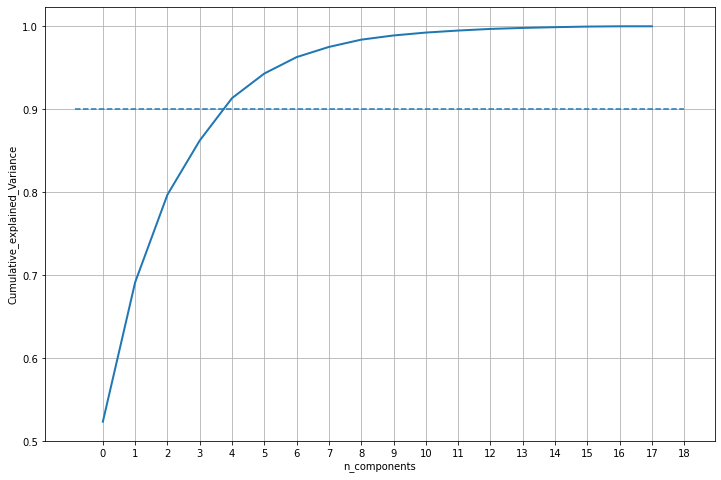

In [57]:
plt.figure(1,figsize=(12,8))
x_int = range(0,19)
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis=('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_Variance')
plt.xticks(x_int)
plt.hlines(0.9, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')
plt.show()

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

In [58]:
## From the above chart, having 4 components or dimenstions will provide over 90%. Hence, lets fit 4 components.
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print("Components: \n", pca4.components_)
print("Variance Ratio: \n", pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

Components: 
 [[ 0.27484078  0.29500882  0.30447457  0.2675079   0.08069127  0.09678469
   0.31699894 -0.313617    0.31391795  0.2823646   0.30942194  0.31438206
   0.27172747 -0.02125458  0.0405684   0.05807023  0.02949257  0.07360159]
 [-0.127602    0.12989852 -0.0746861  -0.18952605 -0.12133577  0.01076957
   0.04722333  0.01332365  0.06030533  0.1156531   0.06178326  0.0517741
   0.20866276  0.48898854 -0.05583938 -0.12442207 -0.54066904 -0.53946094]
 [-0.11942342 -0.02952513 -0.05580716  0.27525575  0.64257209  0.59147506
  -0.09645202  0.05644966 -0.10928933 -0.01683394  0.05665167 -0.1078369
  -0.03104015  0.28538976 -0.11726348 -0.07649824  0.00927722  0.03987014]
 [ 0.07860864  0.1855904  -0.07074072 -0.04231354  0.03499685  0.0313708
  -0.09480063  0.08382299 -0.09197129  0.18639313 -0.11689959 -0.09154091
   0.20007263 -0.06740919  0.60513659 -0.66717826  0.10484346  0.04723492]]
Variance Ratio: 
 [0.52373871 0.16791789 0.10549927 0.06527635]


In [59]:
Xpca4.shape

(846, 4)

### G. Train SVM model on components selected from above step

In [60]:
# Base SVM Classifier

X_train_pca4,X_test_pca4,y_train,y_test=train_test_split(Xpca4,Y,test_size=0.2,random_state=42)

svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_pca4, y_train)

# Model performance
 
y_pred = svm.predict(X_test_pca4)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.624


### H. Print Classification metrics for train data of above model and share insights

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.65      0.33      0.44        52
         car       0.70      0.79      0.75        78
         van       0.48      0.68      0.56        40

    accuracy                           0.62       170
   macro avg       0.61      0.60      0.58       170
weighted avg       0.64      0.62      0.61       170



#### INSIGHTS:
1. bus and van has 65%, 48% as the precision score. That means, 65% of the times, the model correctly predicted that vehicle as bus. For, car, the precision was about 70%, i.e., better than the other two classes.
2. bus and van have again lower recall with 33%, 68% respectively, suggesting that they correctly predicted 33% & 68% of bus and van from the dataset. For car, this score is close to 79%. 
3. F1-score is the harmonic mean for the precision and recall. The model has f1-score as 0.44 for bus, 0.75 for car, & 0.56 for van. Hence, it behaved the best for car as the class and worst for bus.
4. In terms of accuracy, all the three classes were almost similarly accurately predicted.
5. The above model is not a very good model to make predictions. Hence, this requires a lot of tuning.

## Q3

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [62]:
## Using 6 components
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print("Components: \n", pca6.components_)
print("Variance Ratio: \n", pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

Components: 
 [[ 2.74840784e-01  2.95008824e-01  3.04474569e-01  2.67507896e-01
   8.06912709e-02  9.67846926e-02  3.16998936e-01 -3.13617002e-01
   3.13917954e-01  2.82364603e-01  3.09421941e-01  3.14382055e-01
   2.71727470e-01 -2.12545756e-02  4.05684036e-02  5.80702296e-02
   2.94925716e-02  7.36015880e-02]
 [-1.27602001e-01  1.29898521e-01 -7.46860966e-02 -1.89526046e-01
  -1.21335772e-01  1.07695717e-02  4.72233284e-02  1.33236512e-02
   6.03053301e-02  1.15653105e-01  6.17832642e-02  5.17741037e-02
   2.08662764e-01  4.88988544e-01 -5.58393777e-02 -1.24422073e-01
  -5.40669040e-01 -5.39460940e-01]
 [-1.19423416e-01 -2.95251290e-02 -5.58071563e-02  2.75255753e-01
   6.42572087e-01  5.91475064e-01 -9.64520212e-02  5.64496625e-02
  -1.09289334e-01 -1.68339380e-02  5.66516659e-02 -1.07836898e-01
  -3.10401515e-02  2.85389756e-01 -1.17263481e-01 -7.64982370e-02
   9.27722081e-03  3.98701408e-02]
 [ 7.86086445e-02  1.85590399e-01 -7.07407165e-02 -4.23135409e-02
   3.49968532e-02  3.13

In [63]:
# Splitting and fitting SVC for 6 components
X_train_pca6,X_test_pca6,y_train,y_test=train_test_split(Xpca6,Y,test_size=0.2,random_state=42)

svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_pca6, y_train)

# Model performance
 
y_pred = svm.predict(X_test_pca6)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.788


In [64]:
# Using kernel as "rbf"

svm = SVC(kernel= 'rbf', random_state=1, C=0.1)
svm.fit(X_train_pca6, y_train)

# Model performance
 
y_pred = svm.predict(X_test_pca6)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.776


- Changing the kernel didn't improve the accuracy

In [65]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_pca6, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.801 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.741 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.763 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.778 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.801 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.741 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.763 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.801 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [66]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, gamma=1, kernel='linear')


In [67]:
grid_predictions = grid.predict(X_test_pca6)
  
# print accuracy score report
print(accuracy_score(y_test, grid_predictions))

0.7941176470588235


- Let's again try with kernel=rbf

In [68]:
svm = SVC(kernel= 'rbf', random_state=1, C=100,gamma=1)
svm.fit(X_train_pca6, y_train)

# Model performance
 
y_pred = svm.predict(X_test_pca6)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.853


### B. Share best Parameters observed from above step

- Best Parameters observed are for n_components=6:
 
 1. C:100
 2. gamma:1
 3. kernel: rbf

### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.91      0.79      0.85        52
         car       0.80      0.95      0.87        78
         van       0.91      0.75      0.82        40

    accuracy                           0.85       170
   macro avg       0.87      0.83      0.85       170
weighted avg       0.86      0.85      0.85       170



#### INSIGHTS:
1. bus and van has 91% as the precision score. That means, 91% of the times, the model correctly predicted that vehicle as bus or van. For, car, the precision was about 80%.
2. bus and van have slight lower recall with 79%, 75% respectively, suggesting that they correctly predicted 79% & 75% of bus and van from the dataset. For, car this score is close to 95%. 
3. F1-score is the harmonic mean for the precision and recall. The model has almost similar F1-score for all the three categories , i.e., 0.85 for bus, 0.87 for car, & 0.82 for van. Hence, it behaved almost equally good for all the categories with car as the best.
4. In terms of accuracy, as well all the three classes were almost equally accurately predicted.

## Q5

### A. Explain pre-requisite/assumptions of PCA

1. There must be linearity in the data set
2. PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise
3. Outliers, i.e., Extreme values that deviate from other data points in any dataset, should be minimum
4. PCA Assumes that there should be correlation in the features in the dataset.
5. PCA is sensitive to the scale of input data. If the features are widely differently scaled (For e.g., 1 column has values 1-1000, & other column has value 5-30), PCA will provide a biased result.
6. PCA assumes that there are no missing values in the dataframe. Hence, ensure to remove or impute missing values with appropriate data before applying PCA.

### B. Explain advantages and limitations of PCA

##### Advantages
1. Easy computation: It is based on linear algebra, hence, easy to compute.
2. Fast computation for Machine Learning models: Since, it works on reducing the dimenstions, it directly speeds up the training time for Machine Learning models that are applied on PCA data.
3. Reduced dimenstionality avoids overfitting: High-dimensional data causes regression algorithms to overfit easily. By using PCA priorly and reducing the dimensions of the training data, we forbid the predictive algorithms from overfitting. It helps in the mitigation of a concept called "Curse of Dimensionality". 

##### Disadvantages
1. Less interpretability: The new features created out of PCA, doesn't mean anything logically to the human. They are linear combination of the featureset, and hence, not easy to interpret. For E.g., it is difficult to assert which are the  important features in the dataset after performing PCA
2. Trade-off of information loss with dimenstionality reduction: While reducing dimensions, help in the computation and overfitting issues, it does come at the cost of losing information from the data. Unfortunately, utilising PCA forces us to create a required compromise where we must weigh the trade-off between dimensionality reduction and information loss.
3. Data Standardisation is compulsary before appying PCA: PCA will not be able to find the optimal Principal Components if the data is not scaled

## END